In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple

# Configure display options
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.precision", 4)

In [2]:
# Define alternatives
alternatives = [
    "GTS",
    "ISC",
    "RCI",
    "ETP",
]

# Define criteria with clear descriptions
criteria = [
    "Cost per Unit (Php)",  # Lower is better
    "Delivery Time (days)",  # Lower is better
    "Quality Score (%)",  # Higher is better
    "Innovation Index (1-10)",  # Higher is better
    "Sustainability Score (%)",  # Higher is better
]

# Create decision matrix with realistic data for Philippine cities
# Data based on typical characteristics of these cities
# Format: [Cost per Unit, Delivery Time, Quality Score, Innovation Index, Sustainability Score]
decision_matrix = np.array(
    [
        [4550, 12, 94.2, 6.5, 72],
        [5230, 8, 91.8, 9.2, 68],
        [5870, 15, 98.5, 5.8, 85],
        [6120, 18, 89.3, 8.7, 96],
    ]
)

In [3]:
# Create DataFrame for better visualization
df_decision = pd.DataFrame(
    decision_matrix, index=alternatives, columns=criteria
)

df_decision

,Cost per Unit (Php),Delivery Time (days),Quality Score (%),Innovation Index (1-10),Sustainability Score (%)
GTS,4550.0,12.0,94.2,6.5,72.0
ISC,5230.0,8.0,91.8,9.2,68.0
RCI,5870.0,15.0,98.5,5.8,85.0
ETP,6120.0,18.0,89.3,8.7,96.0


In [4]:
def topsis(
    decision_matrix: np.ndarray, weights: np.ndarray, criteria_types: List[str]
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    TOPSIS implementation for multi-criteria decision making

    Parameters:
    - decision_matrix: m x n matrix of alternatives vs criteria
    - weights: array of criterion weights (must sum to 1)
    - criteria_types: list of 'benefit' or 'cost' for each criterion

    Returns:
    - closeness_coefficients: TOPSIS scores for each alternative
    - positive_ideal: positive ideal solution
    - negative_ideal: negative ideal solution
    """

    # Step 1: Normalize the decision matrix (vector normalization)
    normalized_matrix = decision_matrix / np.sqrt(
        np.sum(decision_matrix**2, axis=0)
    )
    # print("Step 1: Normalized Decision Matrix")
    # print(
    #     pd.DataFrame(normalized_matrix, index=alternatives, columns=criteria)
    # )
    # print()

    # Step 2: Calculate weighted normalized matrix
    weighted_matrix = normalized_matrix * weights
    # print("Step 2: Weighted Normalized Matrix")
    # print(pd.DataFrame(weighted_matrix, index=alternatives, columns=criteria))
    # print()

    # Step 3: Determine positive and negative ideal solutions
    positive_ideal = np.zeros(len(criteria))
    negative_ideal = np.zeros(len(criteria))

    for j, criterion_type in enumerate(criteria_types):
        if criterion_type == "benefit":
            positive_ideal[j] = np.max(weighted_matrix[:, j])
            negative_ideal[j] = np.min(weighted_matrix[:, j])
        else:  # cost criterion
            positive_ideal[j] = np.min(weighted_matrix[:, j])
            negative_ideal[j] = np.max(weighted_matrix[:, j])

    # print("Step 3: Ideal Solutions")
    # print(f"Positive Ideal Solution (A+): {positive_ideal}")
    # print(f"Negative Ideal Solution (A-): {negative_ideal}")
    # print()

    # Step 4: Calculate separation measures
    distance_positive = np.sqrt(
        np.sum((weighted_matrix - positive_ideal) ** 2, axis=1)
    )
    distance_negative = np.sqrt(
        np.sum((weighted_matrix - negative_ideal) ** 2, axis=1)
    )

    # print("Step 4: Separation Measures")
    # print(f"Distance to PIS (S+): {distance_positive}")
    # print(f"Distance to NIS (S-): {distance_negative}")
    # print()

    # Step 5: Calculate closeness coefficients
    closeness_coefficients = distance_negative / (
        distance_positive + distance_negative
    )

    return closeness_coefficients, positive_ideal, negative_ideal

In [5]:
# Define criterion weights (must sum to 1.0)
weights = np.array(
    [0.25, 0.20, 0.30, 0.15, 0.10]
)  # Cost, Delivery Time, Quality, Innovation, Sustainability

# Define criterion types for TOPSIS calculation
criterion_types = ["cost", "cost", "benefit", "benefit", "benefit"]

print("TOPSIS Analysis for Distribution Center Location Selection")
print(f"Weights: {dict(zip(criteria, weights))}")
print(f"Criterion Types: {dict(zip(criteria, criterion_types))}")
print()

# Apply TOPSIS
cc_scores, pos_ideal, neg_ideal = topsis(
    decision_matrix, weights, criterion_types
)

TOPSIS Analysis for Distribution Center Location Selection
Weights: {'Cost per Unit (Php)': np.float64(0.25), 'Delivery Time (days)': np.float64(0.2), 'Quality Score (%)': np.float64(0.3), 'Innovation Index (1-10)': np.float64(0.15), 'Sustainability Score (%)': np.float64(0.1)}
Criterion Types: {'Cost per Unit (Php)': 'cost', 'Delivery Time (days)': 'cost', 'Quality Score (%)': 'benefit', 'Innovation Index (1-10)': 'benefit', 'Sustainability Score (%)': 'benefit'}



In [6]:
# Step 6: Rank alternatives and create results summary
print("Step 5: Closeness Coefficients and Final Ranking")

# Create results DataFrame
results_df = pd.DataFrame(
    {
        "Alternative": alternatives,
        "Closeness Coefficient": cc_scores,
        "Rank": np.argsort(-cc_scores) + 1,  # Descending order ranking
    }
)

# Sort by closeness coefficient (descending)
results_df = results_df.sort_values("Closeness Coefficient", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("Final TOPSIS Results:")
print(results_df)

Step 5: Closeness Coefficients and Final Ranking
Final TOPSIS Results:
  Alternative  Closeness Coefficient  Rank
0         ISC                 0.7633     1
1         GTS                 0.5748     2
2         RCI                 0.2979     3
3         ETP                 0.2867     4


In [7]:
# Sensitivity Analysis
def comprehensive_sensitivity_analysis(
    decision_matrix,
    base_weights,
    criteria_types,
    alternatives,
    criteria,
    weight_variations=np.arange(0.1, 0.6, 0.05),
):
    """
    Perform comprehensive sensitivity analysis by varying each criterion's weight.

    Parameters:
    - decision_matrix: Original decision matrix
    - base_weights: Original weights for all criteria
    - criteria_types: List of 'benefit' or 'cost' for each criterion
    - alternatives: List of alternative names
    - criteria: List of criterion names
    - weight_variations: Range of weights to test for each criterion

    Returns:
    - Dictionary containing sensitivity results for each criterion
    """
    base_cc, _, _ = topsis(decision_matrix, base_weights, criteria_types)
    base_ranking = np.argsort(-base_cc) + 1
    base_winner = alternatives[np.argmax(base_cc)]

    sensitivity_results = {}

    for criterion_idx in range(len(criteria)):
        criterion_name = criteria[criterion_idx].split(" (")[0]  # Remove units
        criterion_results = []

        for new_weight in weight_variations:
            if not (0.0 <= new_weight <= 1.0):
                continue

            # Create modified weights
            test_weights = base_weights.copy()
            test_weights[criterion_idx] = new_weight

            # Redistribute remaining weight proportionally
            remaining_weight = 1.0 - new_weight
            other_indices = [
                i for i in range(len(test_weights)) if i != criterion_idx
            ]
            current_other_sum = sum(test_weights[i] for i in other_indices)

            if current_other_sum > 0:
                for i in other_indices:
                    test_weights[i] = test_weights[i] * (
                        remaining_weight / current_other_sum
                    )

            # Calculate new TOPSIS scores (suppress output)
            import sys
            from io import StringIO

            old_stdout = sys.stdout
            sys.stdout = StringIO()

            try:
                new_cc, _, _ = topsis(
                    decision_matrix, test_weights, criteria_types
                )
            finally:
                sys.stdout = old_stdout

            new_ranking = np.argsort(-new_cc) + 1
            new_winner = alternatives[np.argmax(new_cc)]

            # Calculate ranking changes
            rank_changes = np.abs(new_ranking - base_ranking).sum()

            criterion_results.append(
                {
                    "Weight": new_weight,
                    "Winner": new_winner,
                    "Winning_Score": np.max(new_cc),
                    "All_Scores": new_cc.copy(),
                    "Rank_Changes": rank_changes,
                    "Test_Weights": test_weights.copy(),
                }
            )

        sensitivity_results[criterion_name] = criterion_results

    return sensitivity_results, base_winner, base_cc


In [8]:
# Perform comprehensive sensitivity analysis
print("COMPREHENSIVE SENSITIVITY ANALYSIS")

weight_range = np.arange(0.1, 1.0, 0.01)
sensitivity_data, base_winner, base_scores = (
    comprehensive_sensitivity_analysis(
        decision_matrix,
        weights,
        criterion_types,
        alternatives,
        criteria,
        weight_range,
    )
)

print(f"Base case winner: {base_winner}")
print(
    f"Testing weight variations from {weight_range[0]:.2f} to {weight_range[-1]:.2f}"
)
print()

# Analyze stability for each criterion
for criterion_name, results in sensitivity_data.items():
    print(f"CRITERION: {criterion_name}")
    print("-" * 40)

    # Find unique winners and their weight ranges
    winners = {}
    for result in results:
        weight = result["Weight"]
        winner = result["Winner"]

        if winner not in winners:
            winners[winner] = []
        winners[winner].append(weight)

    # Display winner ranges
    for winner, weight_list in winners.items():
        min_weight = min(weight_list)
        max_weight = max(weight_list)
        print(
            f"  {winner:<15}: Wins when weight is {min_weight:.2f}-{max_weight:.2f}"
        )

    # Check stability around current weight
    current_weight = weights[
        list(criteria).index([c for c in criteria if criterion_name in c][0])
    ]
    tolerance = 0.05
    stable_results = [
        r for r in results if abs(r["Weight"] - current_weight) <= tolerance
    ]
    stable_winners = [r["Winner"] for r in stable_results]

    print(f"  Current weight: {current_weight:.2f}")
    if len(set(stable_winners)) == 1:
        print(f"  Stable around current weight: {stable_winners[0]}")
    else:
        print(f"  Winner changes near current weight: {set(stable_winners)}")
    print()

COMPREHENSIVE SENSITIVITY ANALYSIS
Base case winner: ISC
Testing weight variations from 0.10 to 0.99

CRITERION: Cost per Unit
----------------------------------------
  ISC            : Wins when weight is 0.10-0.43
  GTS            : Wins when weight is 0.44-0.99
  Current weight: 0.25
  Stable around current weight: ISC

CRITERION: Delivery Time
----------------------------------------
  ISC            : Wins when weight is 0.10-0.99
  Current weight: 0.20
  Stable around current weight: ISC

CRITERION: Quality Score
----------------------------------------
  ISC            : Wins when weight is 0.10-0.71
  RCI            : Wins when weight is 0.72-0.99
  Current weight: 0.30
  Stable around current weight: ISC

CRITERION: Innovation Index
----------------------------------------
  ISC            : Wins when weight is 0.10-0.99
  Current weight: 0.15
  Stable around current weight: ISC

CRITERION: Sustainability Score
----------------------------------------
  ISC            : Wins 

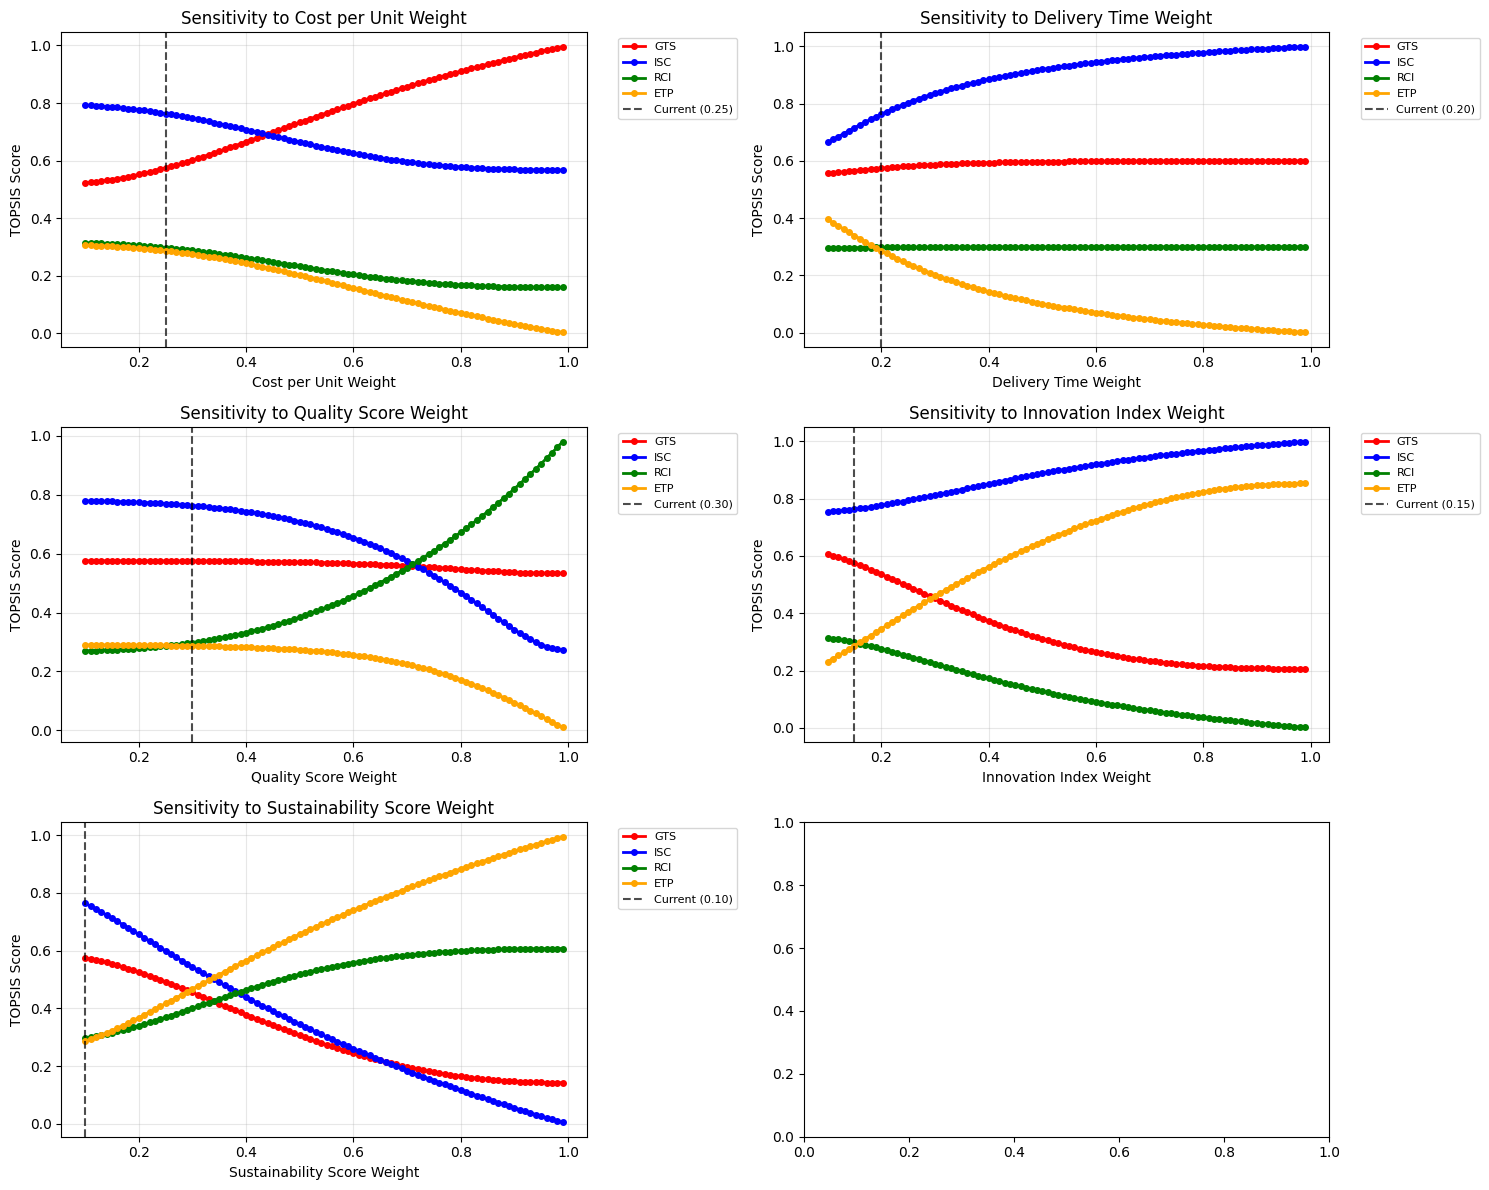

In [14]:
# Create subplots for each criterion
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

criterion_names = list(sensitivity_data.keys())
colors = [
    "red",
    "blue",
    "green",
    "orange",
]

for idx, criterion_name in enumerate(criterion_names):
    ax = axes[idx]
    results = sensitivity_data[criterion_name]

    # Plot TOPSIS scores for each alternative
    for i, alternative in enumerate(alternatives):
        scores = [result["All_Scores"][i] for result in results]
        weights_tested = [result["Weight"] for result in results]
        ax.plot(
            weights_tested,
            scores,
            marker="o",
            label=alternative,
            color=colors[i % len(colors)],
            linewidth=2,
            markersize=4,
        )

    # Mark current weight
    current_weight_idx = list(criteria).index(
        [c for c in criteria if criterion_name in c][0]
    )
    current_weight = weights[current_weight_idx]
    ax.axvline(
        x=current_weight,
        color="black",
        linestyle="--",
        label=f"Current ({current_weight:.2f})",
        alpha=0.7,
    )

    ax.set_xlabel(f"{criterion_name} Weight")
    ax.set_ylabel("TOPSIS Score")
    ax.set_title(f"Sensitivity to {criterion_name} Weight")
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)

plt.tight_layout()
plt.show()